# Fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dedalus import public as de
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
xbasis = de.Fourier('x', 64, interval=(-np.pi, np.pi), dealias=3/2)
ybasis = de.Chebyshev('y', 64, interval=(-1, 1), dealias=3/2)
domain = de.Domain([xbasis, ybasis], grid_dtype=np.float64)
f = de.Field(domain, name='f')

In [4]:
f.layout.grid_space

array([False, False])

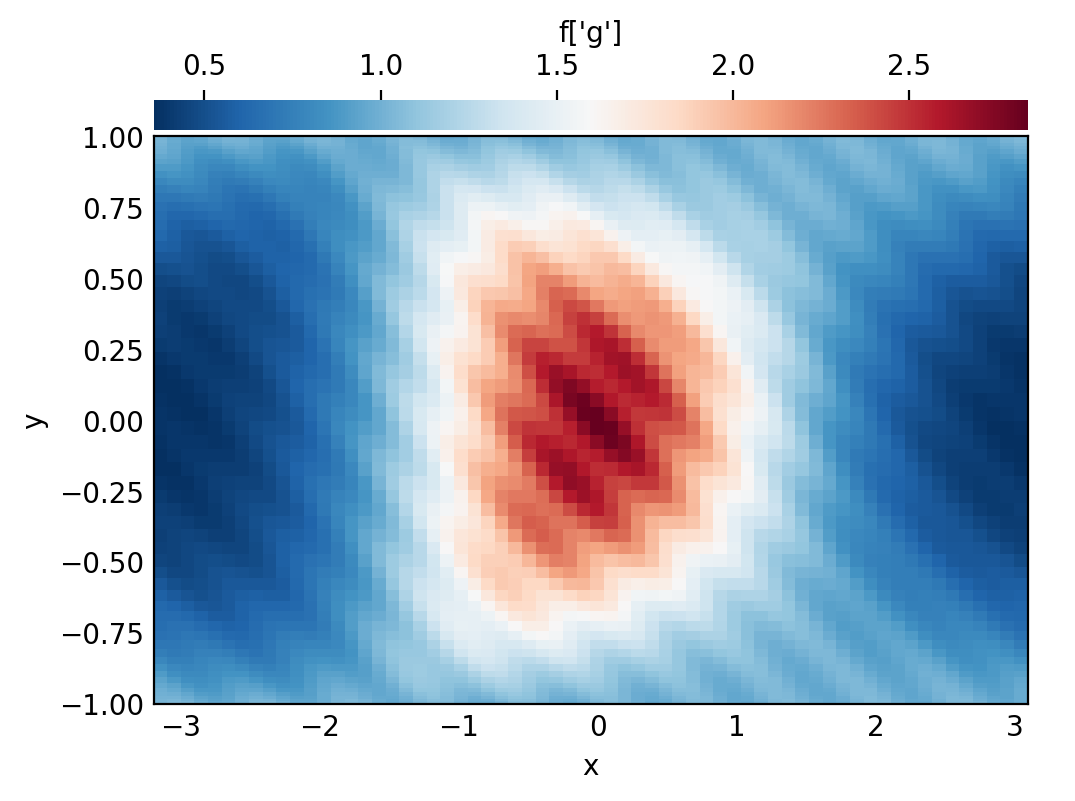

In [5]:
x, y = domain.grids(scales=1)
f.set_scales(1)
f['g'] = np.exp((1-y**2)*np.cos(x+np.cos(x)*y**2)) * (1 + 0.05*np.cos(10*(x+2*y)))
# Plot grid values
plot_bot_2d(f, figkw=figkw, title="f['g']");

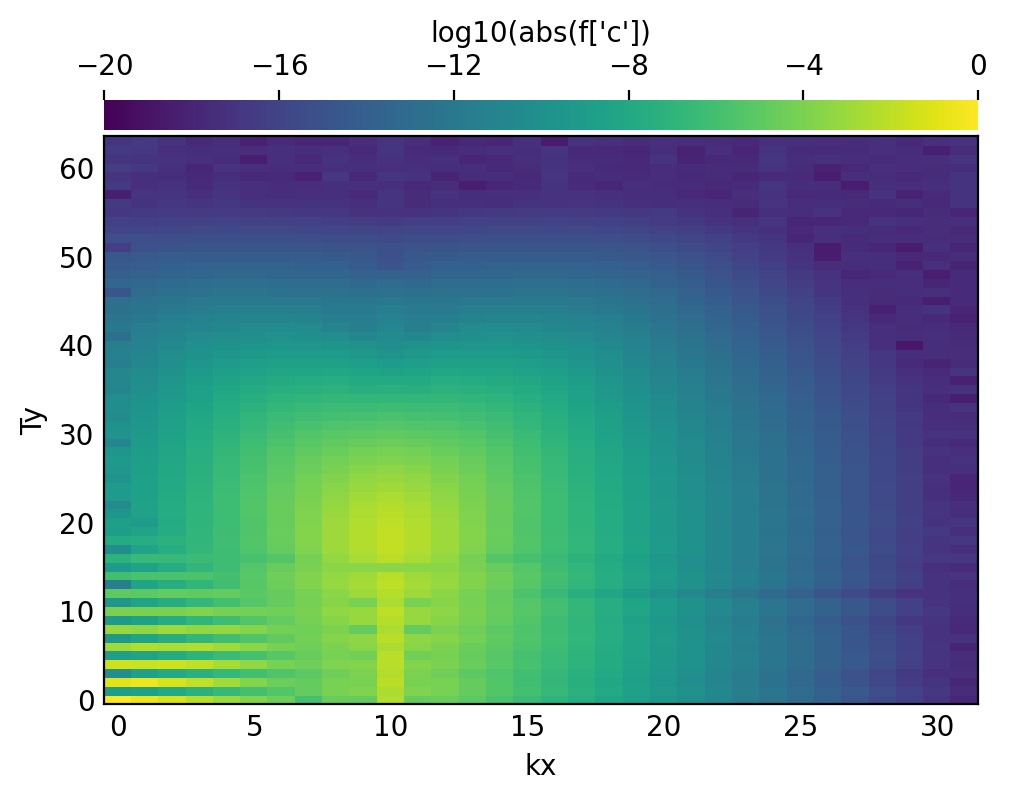

In [7]:
f['c']
# Plot log magnitude of spectral coefficients
log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))
plot_bot_2d(f, func=log_mag, clim=(-20, 0), cmap='viridis', title="log10(abs(f['c'])",figkw=figkw);

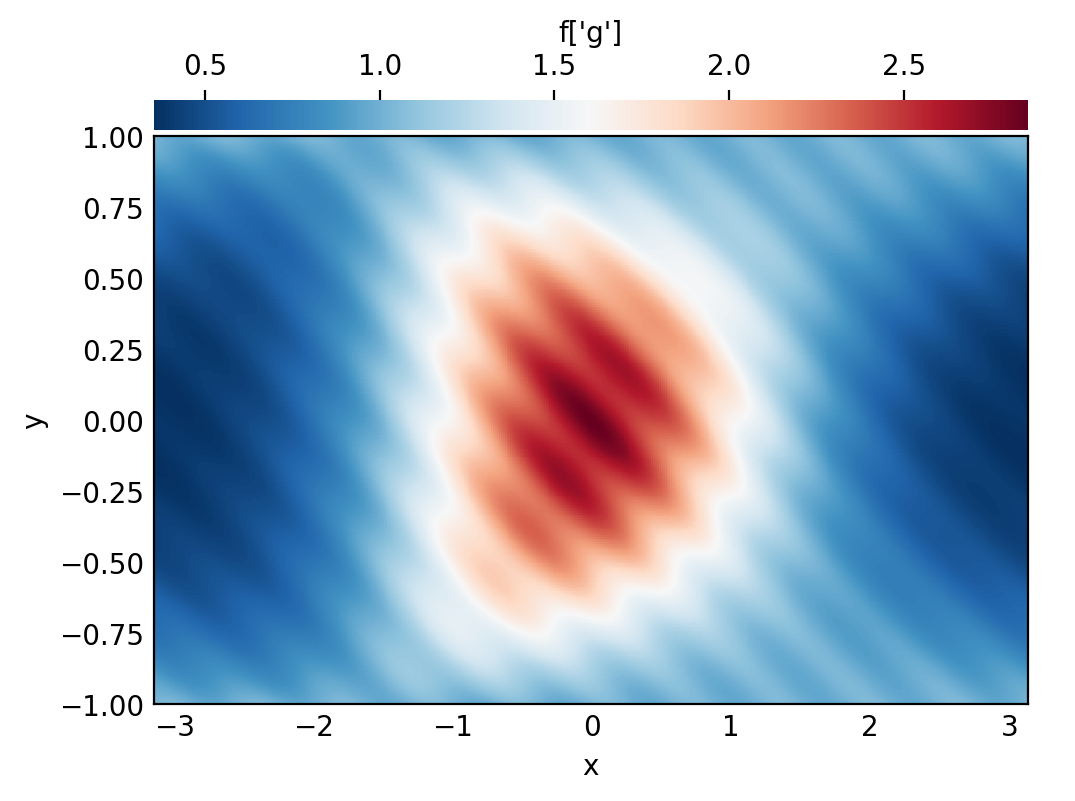

In [9]:
f.set_scales(7)
# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

# Operators

In [ ]:
# Arithmatic Fields

In [10]:
g_op = 1 - 2*f
print(g_op)

1 + (-1*(2*f))


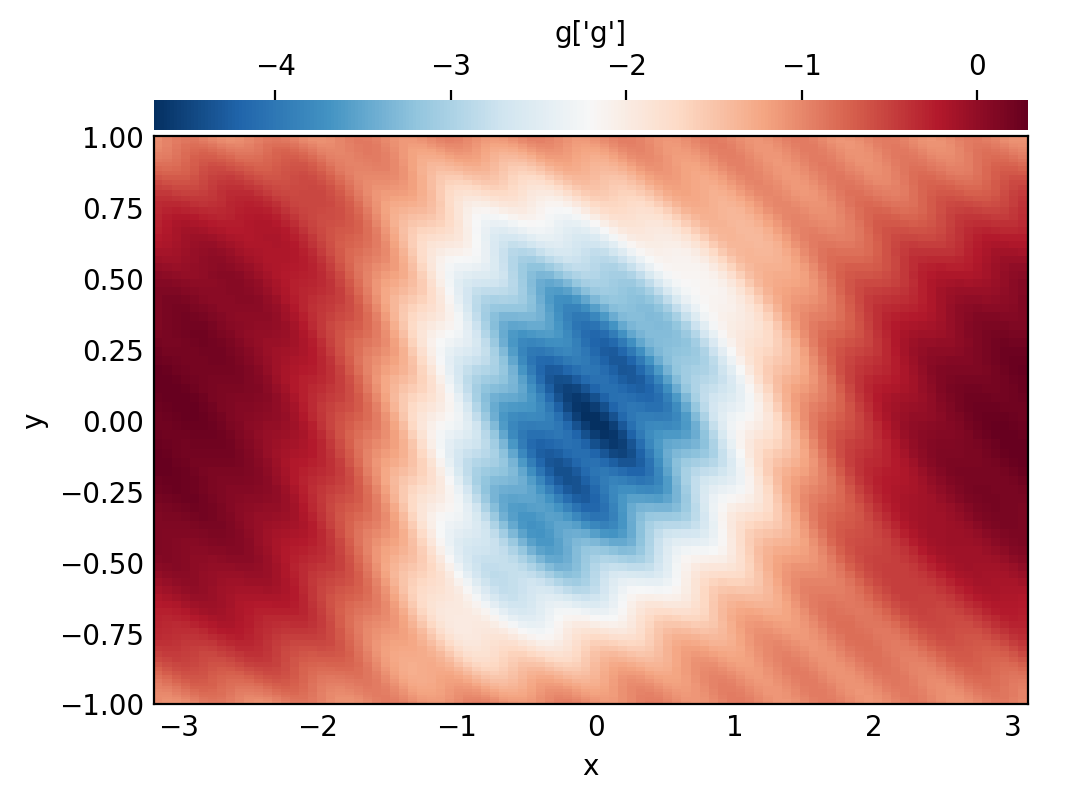

In [11]:
g = g_op.evaluate()
# Plot grid values
g['g']
plot_bot_2d(g, title="g['g']", figkw=figkw);

In [12]:
# Building Expressions

In [27]:
h_op = 1 / np.cosh(g_op + 2.5)
print(h_op)

cosh((1 + (-1*(2*f))) + 2.5)**-1


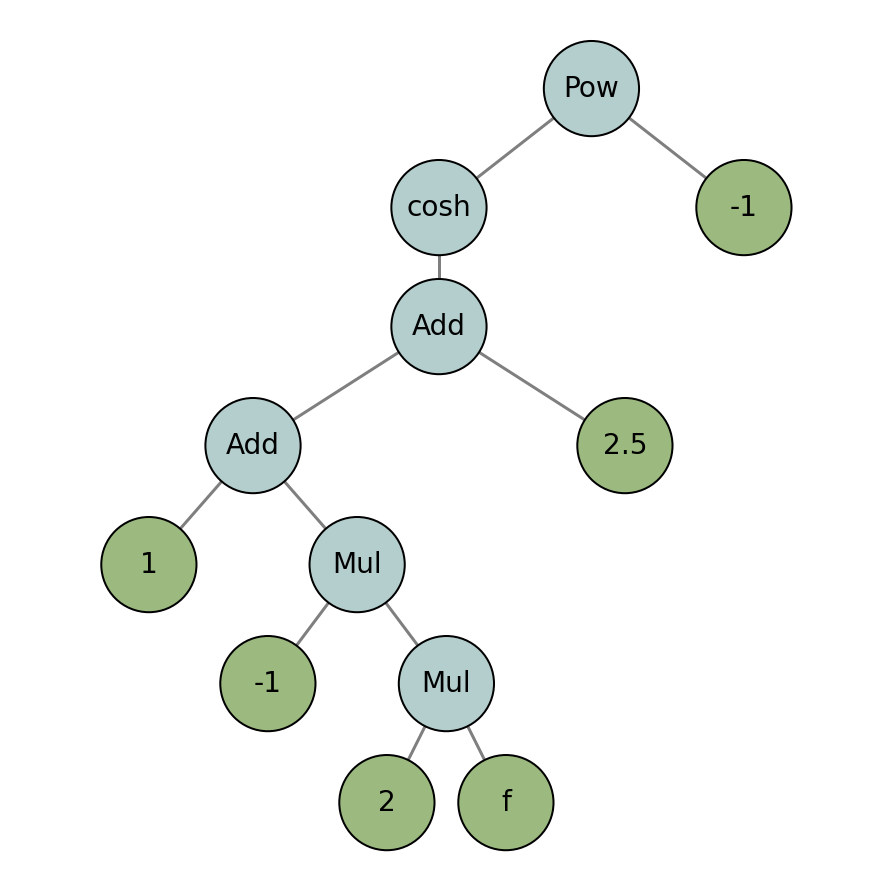

In [28]:
from dedalus.tools.plot_op import plot_operator
plot_operator(h_op, figsize=6, fontsize=14, opsize=0.4)

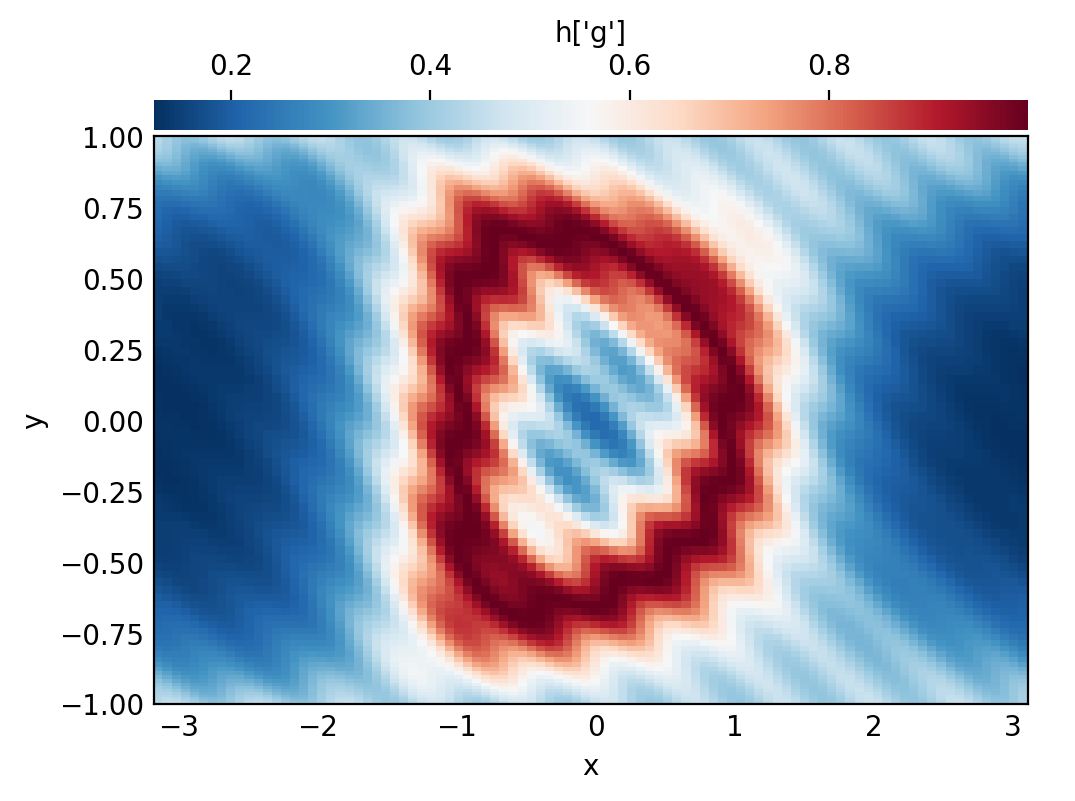

In [29]:
h = h_op.evaluate()
# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);

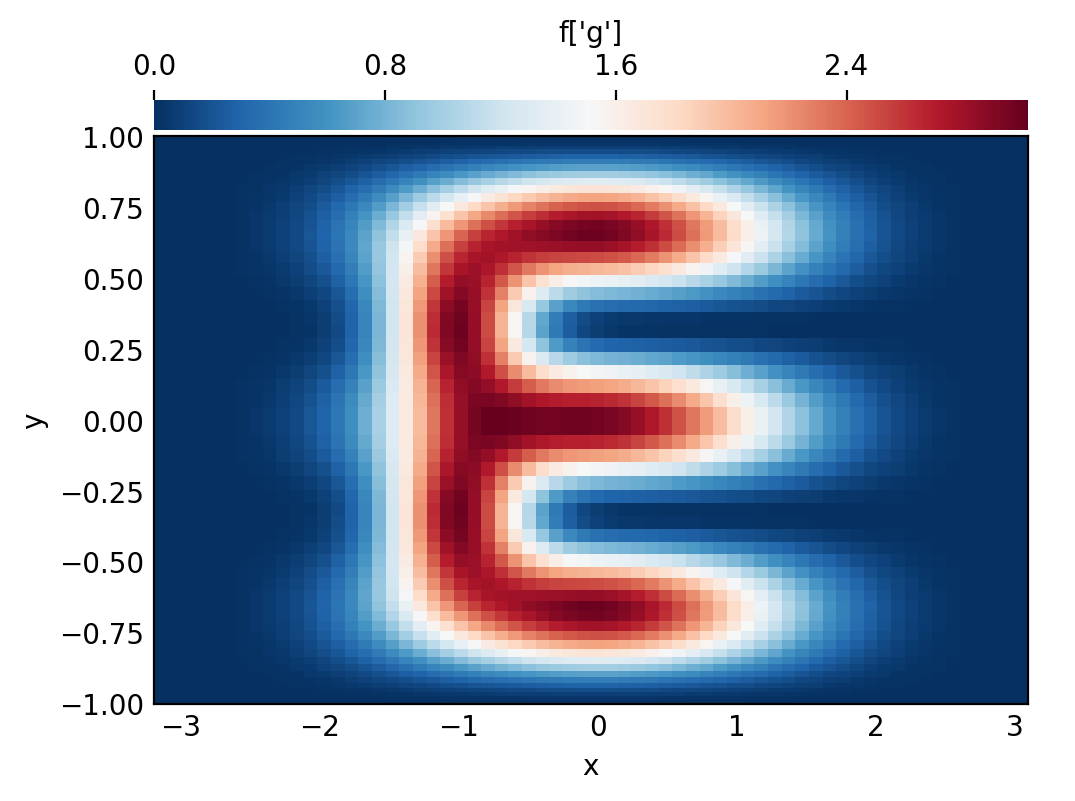

In [31]:
# Set scales back to 1 to build new grid data
f.set_scales(1)
f['g'] = 3*np.cos(1.5*np.pi*y)**2 * np.cos(x/2)**4 + 3*np.exp(-((2*x+2)**2 + (4*y+4/3)**2)) + 3*np.exp(-((2*x+2)**2 + (4*y-4/3)**2))
# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

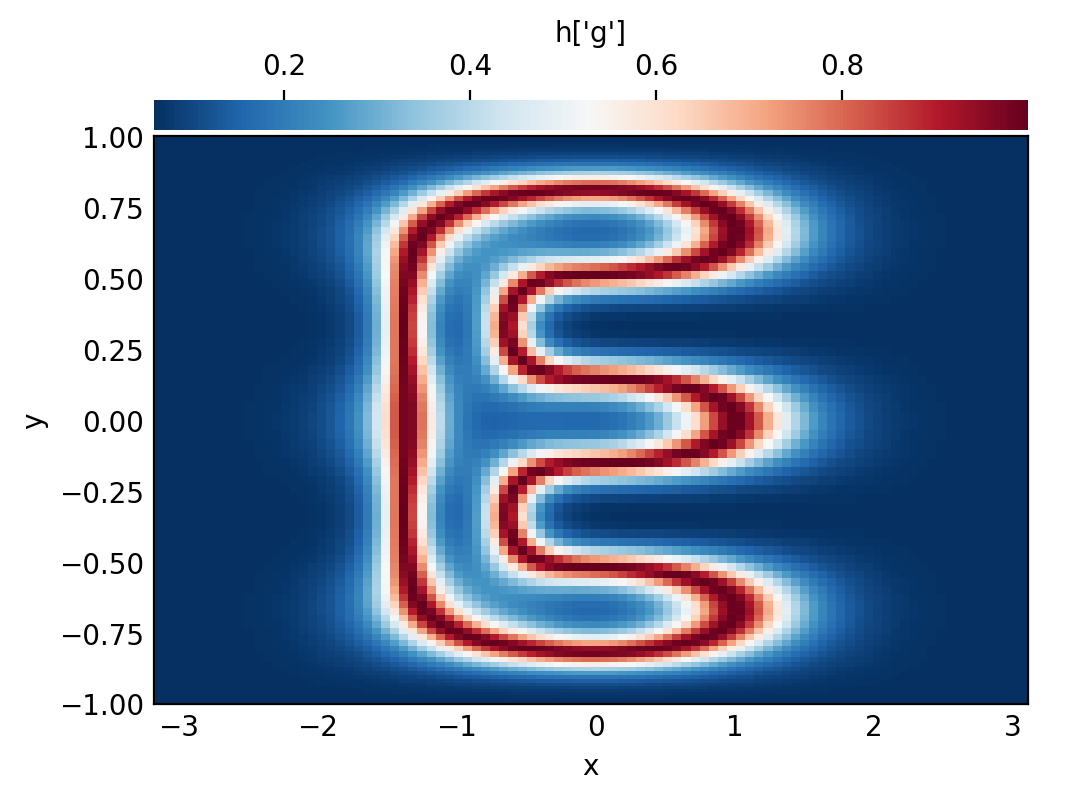

In [32]:
 h = h_op.evaluate()
# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);

In [33]:
# Differentiation, integration, interpolation

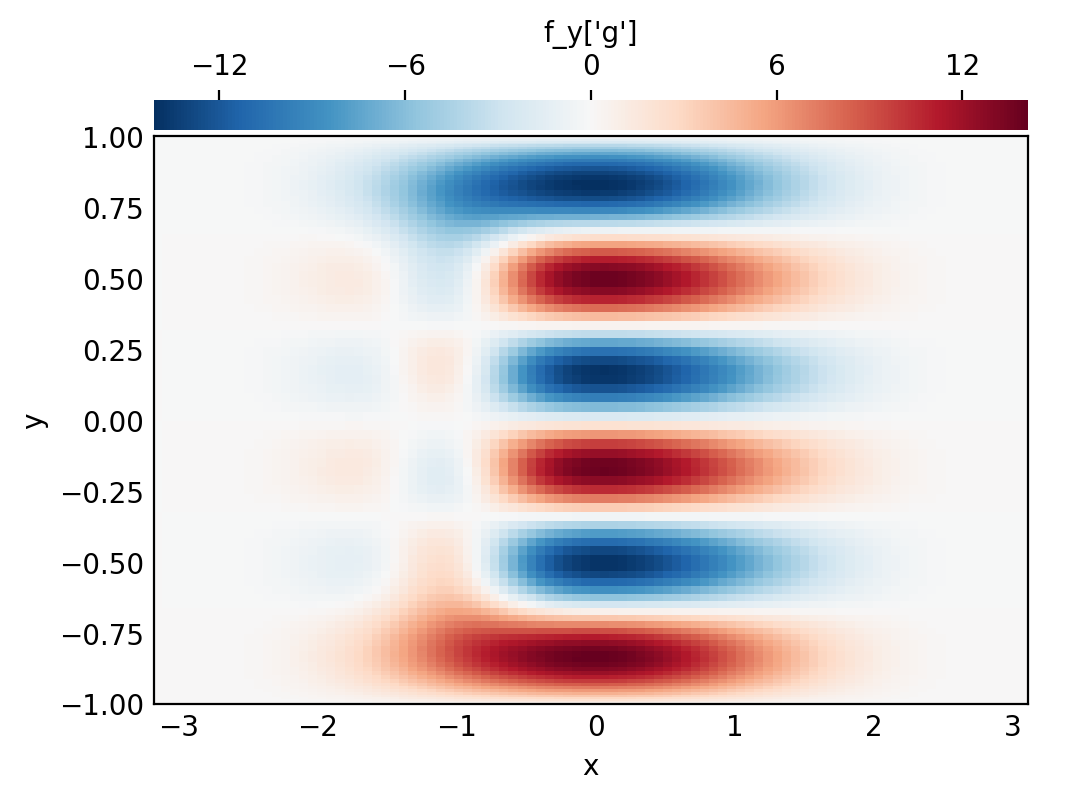

In [34]:
# Basis operators
f_y_op = ybasis.Differentiate(f)
f_yint_op = ybasis.Integrate(f)
f_y0_op = ybasis.Interpolate(f, position=0)
# Plot f_y
f_y = f_y_op.evaluate()
f_y['g']
plot_bot_2d(f_y, title="f_y['g']", figkw=figkw);

In [35]:
# Operator factories
f_xxyy_op = de.operators.differentiate(f, x=2, y=2)
f_int_op = de.operators.integrate(f, 'x', 'y')
f_00_op = de.operators.interpolate(f, x=0, y=0)
# See structure of f_int_op
print('f_int_op:', f_int_op)
print()
# Print total integral
# The result is a constant field, so we can print its value at any grid point
f_int = f_int_op.evaluate()
print('Total integral of f:', f_int['g'][0,0])

f_int_op: integ_y(integ_x(f))

Total integral of f: 9.424586589055345


In [36]:
# Field methods
fxxyy = f.differentiate(x=2, y=2)
total_int_f = f.integrate('x', 'y')
f00 = f.interpolate(x=0, y=0)
# Print point interpolation
# The result is a constant field, so we can print its value at any grid point
print('f(x=0, y=0):', f00['g'][0,0])

f(x=0, y=0): 3.01857352108801
